## Analyse Benchmark Testbed

In [28]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import json
import glob
import pickle



JOBCENTRIC = False



# DATA_NAME = 'social_media_cloud_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
DATA_NAME = 'skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional'
# DATA_NAME = 'jobcentric_prototyping_k_4_L_2_n_16_chancap1_numchans1_mldat3e3_bidirectional'


# path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v3.obj'.format(DATA_NAME)
# path_to_testbed_data = '/scratch/datasets/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data'.format(DATA_NAME)
path_to_testbed_data = '/rdata/ong/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data'.format(DATA_NAME)
# path_to_testbed_data = '/rdata/ong/trafpy/management/jobcentric/{}_slotsize_10.0_testbed_data'.format(DATA_NAME)


if os.path.isdir(path_to_testbed_data):
    # data split into separate files in a directory
    separate_files = True
    # load paths to testbed data dirs
    testbed_data_list = sorted(glob.glob(path_to_testbed_data + '/*'))
    print(testbed_data_list)
    envs = []
    for testbed_path in testbed_data_list:
        try:
            filehandler = open(testbed_path+'/simulation.obj', 'rb')
            envs.append(pickle.load(filehandler))
        except FileNotFoundError:
            print('No simulation.obj in {}'.format(testbed_path))
        
else:
    # all data stored in single file
    separate_files = False
    # load raw testbed data
    filehandler = open(path_to_benchmark_data, 'rb')
    testbed_data = pickle.load(filehandler)
    print(testbed_data.keys())
    # unpack env dicts into list of env objects
    envs = testbed_data['envs']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_

In [29]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import os

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    env_analyser_database_path = path_to_testbed_data+'/'+analyser.env.sim_name
    analyser.compute_metrics(measurement_start_time='auto', # 'auto' None
                             measurement_end_time='auto', # 'auto' None
                             env_analyser_database_path=env_analyser_database_path,
                             overwrite=False,
                             print_summary=True)


Computing metrics for env benchmark_skewed_load_0.1_repeat_0_scheduler_FF...
/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.1_repeat_0_scheduler_FF/env_analyser_database exists and overwrite is False. Loading previously completed analysis...
Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.370837926864624 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 705689.3256743776 μs (Start time : 78409.92507493086 μs | End time: 784099.2507493085 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Tot

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.36865806579589844 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 357401.561512503 μs (Start time : 39711.28461250034 μs | End time: 397112.84612500336 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2860649930.0 B
Total info transported: 2803205696.0 B
Load (abs): 8004.0219127579985 B/μs
Load (frac): 0.20010054781894995 fraction of network capacity requested.
Throughput (abs): 7843.2944840447635 B/μs
Throughput (frac): 0.9799191668307349 fraction of arrived info successfully transported.
T-Score: -660.4018334075433

 ~* Flow Information *~
Total number 

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.3_repeat_0_scheduler_FS/env_analyser_database in 0.5403552055358887 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.3_repeat_0_scheduler_FS'
Measurement duration: 476070.3211504149 μs (Start time : 52896.70235004611 μs | End time: 528967.023500461 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5713069708.0 B
Total info transported: 5607002212.0 B
Load (abs): 12000.474413516213 B/μs
Load (frac): 0.30001186033790533 fraction of network capacity requested.
Throughput (abs): 11777.676454291008 B/μs
Throughput (frac): 0.9814342373852932 fraction of arrived info successfully transported.
T-Score: -1084.4601598157712

 ~* Flow Information *~
Total number o

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.4_repeat_0_scheduler_Rand/env_analyser_database in 0.9611241817474365 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.4_repeat_0_scheduler_Rand'
Measurement duration: 362037.20231247955 μs (Start time : 40226.35581249773 μs | End time: 402263.5581249773 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5762341138.0 B
Total info transported: 5194274008.0 B
Load (abs): 15916.433728891872 B/μs
Load (frac): 0.3979108432222968 fraction of network capacity requested.
Throughput (abs): 14347.348766430769 B/μs
Throughput (frac): 0.9014173030725554 fraction of arrived info successfully transported.
T-Score: -1359.2388098398894

 ~* Flow Information *~
Total num

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.5_repeat_0_scheduler_SRPT/env_analyser_database in 0.717322587966919 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 295680.33198046446 μs (Start time : 32853.370220051605 μs | End time: 328533.70220051607 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5984220047.0 B
Total info transported: 5600985044.0 B
Load (abs): 20238.816721145242 B/μs
Load (frac): 0.5059704180286311 fraction of network capacity requested.
Throughput (abs): 18942.704124026943 B/μs
Throughput (frac): 0.9359590723619658 fraction of arrived info successfully transported.
T-Score: -1027.2489502740202

 ~* Flow Information *~
Total nu

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.2447829246520996 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 408915.5419284797 μs (Start time : 45435.06021427552 μs | End time: 454350.60214275523 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11531864698.0 B
Total info transported: 10384344101.0 B
Load (abs): 28201.09170616203 B/μs
Load (frac): 0.7050272926540507 fraction of network capacity requested.
Throughput (abs): 25394.838386495583 B/μs
Throughput (frac): 0.900491323211673 fraction of arrived info successfully transported.
T-Score: -2192.076176161969

 ~* Flow Information *~
Total number o

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.8_repeat_0_scheduler_FS/env_analyser_database in 0.9511170387268066 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.8_repeat_0_scheduler_FS'
Measurement duration: 328362.35726260964 μs (Start time : 36484.70636251219 μs | End time: 364847.06362512184 μs)
Total number of generated demands (jobs or flows) passed to env: 499764
Total info arrived: 10502969115.0 B
Total info transported: 8875188652.0 B
Load (abs): 31985.910938628665 B/μs
Load (frac): 0.7996477734657166 fraction of network capacity requested.
Throughput (abs): 27028.64215614708 B/μs
Throughput (frac): 0.8450171141915236 fraction of arrived info successfully transported.
T-Score: -1504.4773322464441

 ~* Flow Information *~
Total number

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_skewed_load_0.9_repeat_0_scheduler_Rand/env_analyser_database in 1.1095576286315918 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_skewed_load_0.9_repeat_0_scheduler_Rand'
Measurement duration: 304984.34100016684 μs (Start time : 33887.14900001854 μs | End time: 338871.4900001854 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10913230113.0 B
Total info transported: 7085286629.0 B
Load (abs): 35782.91946796714 B/μs
Load (frac): 0.8945729866991785 fraction of network capacity requested.
Throughput (abs): 23231.64069920601 B/μs
Throughput (frac): 0.6492382691133675 fraction of arrived info successfully transported.
T-Score: -8281.550142987018

 ~* Flow Information *~
Total numbe

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.10,SRPT,-227.705785,1518.5,1998.1,47675.8,0.995993,0.00114,0.00401
1,0.10,FS,-227.709332,1518.9,1997.6,45675.8,0.995993,0.00114,0.00401
2,0.10,Rand,-229.433078,1543.0,2739.5,63928.7,0.995966,0.00114,0.00403
3,0.10,FF,-237.607321,1554.1,2951.8,52597.3,0.995860,0.00119,0.00414
4,0.20,SRPT,-588.389345,1526.1,2355.2,52366.2,0.985448,0.00293,0.01460
5,0.20,FS,-591.662303,1524.3,1999.9,46366.2,0.982212,0.00294,0.01780
6,0.20,Rand,-624.467154,1579.6,3044.8,85366.2,0.968557,0.00310,0.03140
7,0.20,FF,-660.401833,1621.3,4390.0,48366.2,0.979919,0.00328,0.02010
8,0.30,SRPT,-1078.762554,1535.3,2666.1,72024.1,0.983069,0.00536,0.01690
9,0.30,FS,-1084.460160,1529.2,2343.3,61024.1,0.981434,0.00539,0.01860


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.10,SRPT,FS,FS,SRPT+FS,SRPT+FS+Rand,SRPT+FS
1,0.20,FS,FS,FS,SRPT,SRPT,SRPT
2,0.30,FS,FS,FS,SRPT,SRPT,SRPT
3,0.40,FS,FS,FS,FF,FS,FS+FF
4,0.51,FS,SRPT,FF,FS,SRPT,FS
5,0.60,FS,SRPT,FS,FS,FS,FS
6,0.71,SRPT,SRPT,FF,FS,FS,FS
7,0.80,FS,SRPT,SRPT,FF,FS,FF
8,0.89,FS,FS,FS,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.10,SRPT(-2.291%) | FS(-2.265%) | Rand(-0.7142%) | FF,FS(-32.33%) | SRPT(-32.31%) | Rand(-7.192%) | FF,FS(-28.55%) | SRPT(-25.42%) | FF(-17.73%) | Rand,FS(0.01336%) | SRPT(0.01336%) | Rand(0.01064%)...,SRPT(-4.202%) | FS(-4.202%) | Rand(-4.202%) | FF,SRPT(-3.14%) | FS(-3.14%) | Rand(-2.657%) | FF
1,0.20,FS(-5.983%) | SRPT(-5.872%) | Rand(-2.572%) | FF,FS(-54.44%) | SRPT(-46.35%) | Rand(-30.64%) | FF,FS(-45.69%) | FF(-43.34%) | SRPT(-38.66%) | Rand,SRPT(1.744%) | FS(1.41%) | FF(1.173%) | Rand,SRPT(-10.67%) | FS(-10.37%) | Rand(-5.488%) | FF,SRPT(-53.5%) | FS(-43.31%) | FF(-35.99%) | Rand
2,0.30,FS(-10.28%) | SRPT(-9.927%) | Rand(-3.948%) | FF,FS(-59.7%) | SRPT(-54.14%) | Rand(-34.16%) | FF,FS(-55.28%) | FF(-53.5%) | SRPT(-47.22%) | Rand,SRPT(0.8474%) | FS(0.6797%) | FF(0.6433%) | Rand,SRPT(-4.114%) | FS(-3.578%) | FF(-0.1789%) | Rand,SRPT(-32.94%) | FS(-26.19%) | FF(-25.0%) | Rand
3,0.40,FS(-20.74%) | SRPT(-20.28%) | Rand(-6.614%) | FF,FS(-73.08%) | SRPT(-72.03%) | Rand(-44.36%) | FF,FS(-65.95%) | FF(-64.75%) | SRPT(-59.23%) | Rand,FF(8.539%) | FS(8.538%) | SRPT(8.015%) | Rand,FS(-21.19%) | SRPT(-20.0%) | FF(-2.519%) | Rand,FS(-78.09%) | FF(-78.09%) | SRPT(-73.33%) | Rand
4,0.51,FS(-31.58%) | SRPT(-30.87%) | Rand(-9.298%) | FF,SRPT(-80.44%) | FS(-78.8%) | Rand(-47.15%) | FF,FF(-53.87%) | FS(-44.56%) | SRPT(-29.55%) | Rand,FS(15.37%) | FF(15.2%) | SRPT(14.5%) | Rand,SRPT(-42.76%) | FS(-42.65%) | FF(-12.12%) | Rand,FS(-68.91%) | FF(-68.14%) | SRPT(-65.03%) | Rand
5,0.60,FS(-47.91%) | SRPT(-47.28%) | FF(-4.881%) | Rand,SRPT(-84.86%) | FS(-82.59%) | Rand(-30.43%) | FF,FS(-39.72%) | SRPT(-37.73%) | FF(-33.85%) | Rand,FS(18.86%) | FF(17.97%) | SRPT(16.33%) | Rand,FS(-61.9%) | SRPT(-61.27%) | FF(-27.85%) | Rand,FS(-81.87%) | FF(-77.97%) | SRPT(-70.86%) | Rand
6,0.71,SRPT(-55.2%) | FS(-55.15%) | FF(-0.707%) | Rand,SRPT(-87.09%) | FS(-81.12%) | Rand(-32.91%) | FF,FF(-23.13%) | FS(-22.4%) | Rand(-7.38%) | SRPT,FS(22.12%) | FF(19.85%) | SRPT(17.65%) | Rand,FS(-72.13%) | SRPT(-71.1%) | FF(-19.85%) | Rand,FS(-66.87%) | FF(-60.04%) | SRPT(-53.41%) | Rand
7,0.80,FS(-60.74%) | SRPT(-60.22%) | Rand(-2.862%) | FF,SRPT(-86.15%) | FS(-80.02%) | Rand(-38.49%) | FF,SRPT(-27.54%) | FS(-3.176%) | Rand(-1.766%) | FF,FF(20.68%) | FS(20.01%) | SRPT(14.99%) | Rand,FS(-66.2%) | SRPT(-65.48%) | Rand(-4.977%) | FF,FF(-49.32%) | FS(-47.64%) | SRPT(-35.81%) | Rand
8,0.89,FS(-71.24%) | SRPT(-63.31%) | FF(-19.85%) | Rand,FS(-74.92%) | SRPT(-61.56%) | Rand(-29.73%) | FF,FS(-13.8%) | SRPT(-5.886%) | Rand(-1.272%) | FF,FF(26.42%) | FS(21.96%) | SRPT(14.52%) | Rand,FS(-80.69%) | SRPT(-54.99%) | Rand(-16.29%) | FF,FF(-49.0%) | FS(-40.74%) | SRPT(-27.07%) | Rand


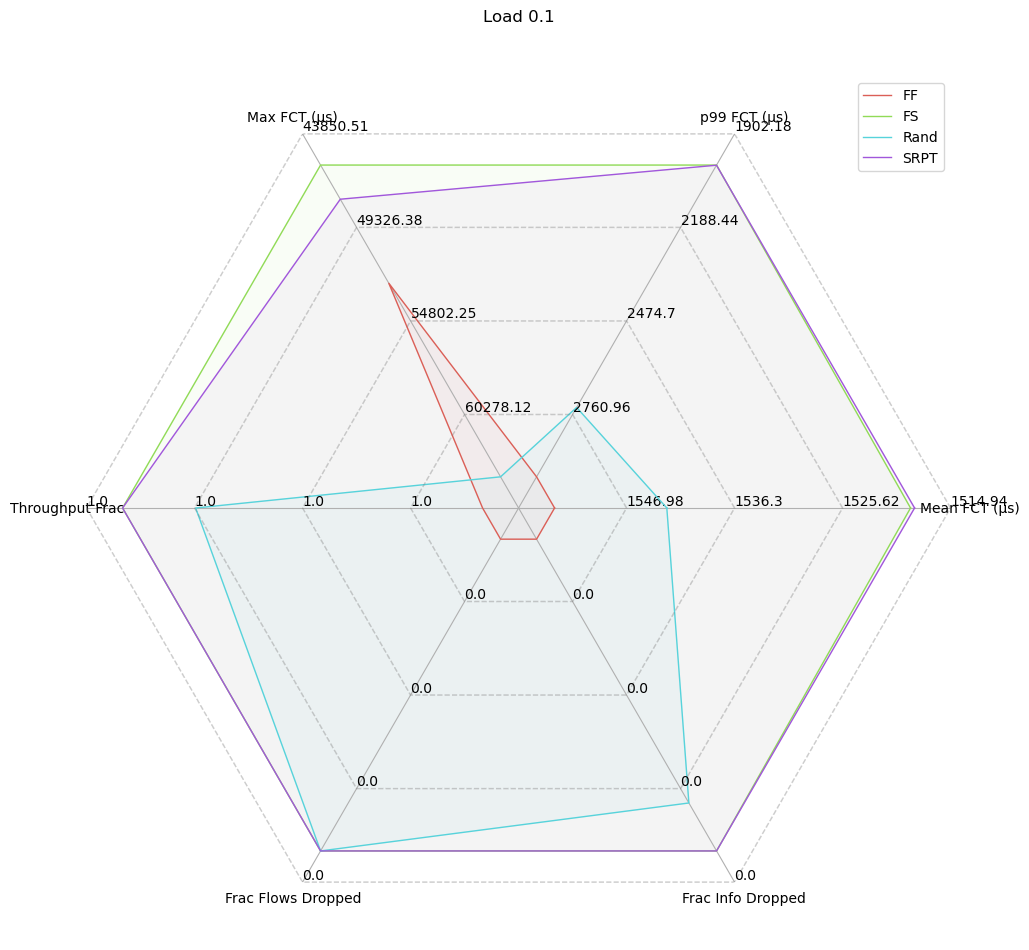

Exception: 

In [30]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import time


start = time.time()
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B')
_ = plotter.display_t_score_table(*analysers, display_table=True)
raise Exception()
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
# _ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=10, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




_ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)
_ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_fcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_max_fct_vs_load(*analysers, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

if JOBCENTRIC:
    _ = plotter.plot_jcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
    _ = plotter.plot_mean_jct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
    _ = plotter.plot_99th_percentile_jct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
    _ = plotter.plot_max_jct_vs_load(*analysers, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
    _ = plotter.plot_fraction_of_arrived_jobs_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)



end = time.time()
print('Time to plot: {}'.format(end-start))

In [ ]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

In [ ]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

In [ ]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
